In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import scipy.stats as stats
import matplotlib.patches as patches
import plotly.express as px

from utils import dibuja_covar, dibuja_covar_ax, plot_frontier_modif

plt.style.use('ggplot')


$$\epsilon_{\mu} = \frac{\sigma}{\sqrt{T}}$$

donde:
-  $\epsilon_{\mu}$ es el error cometido en la estimación de la media

- $\sigma$ es la volatilidad del activo

- $T$ es la longitud del periodo de medida

Esto quiere decir que, por ejemplo, para un activo con una volatilidad del 20%, si contamos con los datos de 20 años, el error cometido en la estimación de la media será del 4.47%.

Veamos el efecto que tiene este error en el cálculo de la frontera eficiente. 

In [2]:
#definimos los ticvkers de los activos que vamos a usar
assets = ['AAPL', 'APA', 'CMCSA', 'CPB', 'JCI', 'MO', 'MSFT', 'TGT']

In [3]:
# Nos bajamos los precios de cierre ajustados entre dos fechas
start = '2003-01-02'
end = '2022-12-31'

prices = yf.download(assets, start=start, end=end)['Adj Close']
ret = prices.pct_change().dropna()

[*********************100%%**********************]  8 of 8 completed


In [4]:
ret_mean = ret.mean(axis=0)
ret_cov = ret.cov()

In [5]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=ret)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

In [6]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

NameError: name 'mu' is not defined

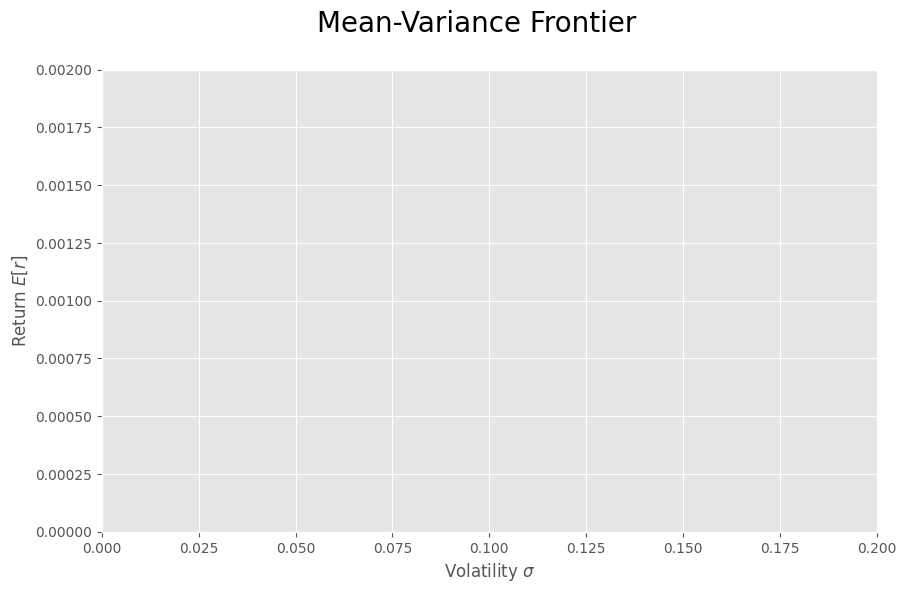

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Mean-Variance Frontier', fontsize=20)
ax.set_xlabel('Volatility $\sigma$')
ax.set_ylabel('Return $E[r]$')
ax.set_xlim([0.0, 0.2])
ax.set_ylim([0.0, 0.002])
ax = plot_frontier_modif(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)
colorbar.remove()

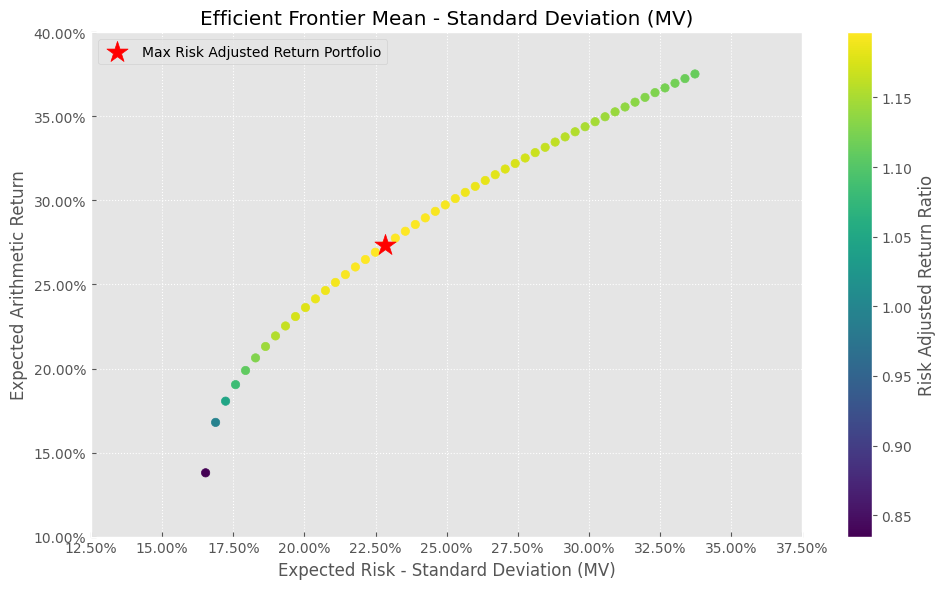

In [38]:
ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [39]:
type(ax)

matplotlib.axes._axes.Axes

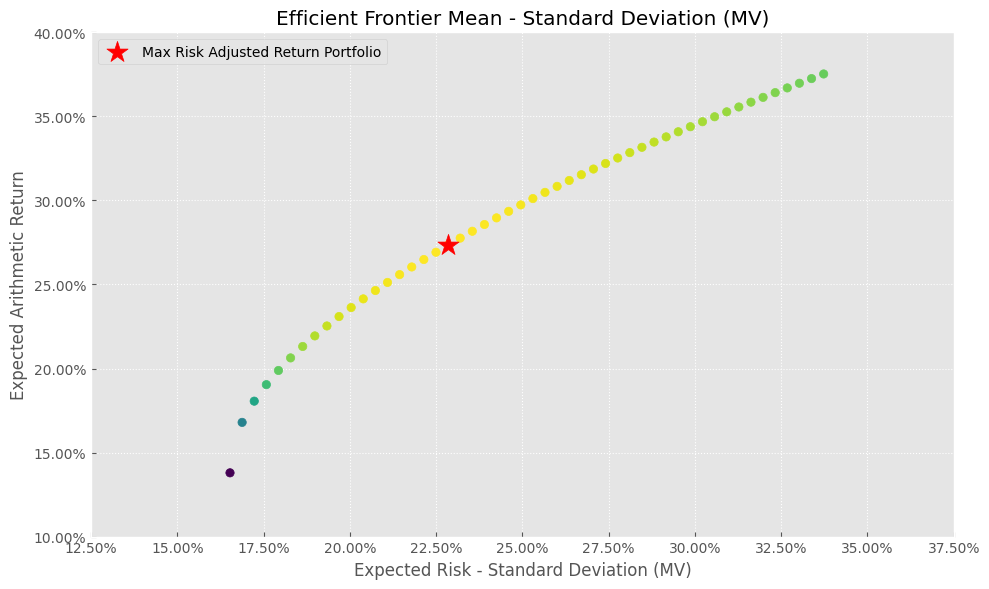

In [7]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = plot_frontier_modif(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [9]:
error = 0.0447
mat_error = np.random.choice([1-error, 0, 1+error], size=(ret.shape[0], ret.shape[1]))

ret_error = ret * pd.DataFrame(mat_error, index=ret.index, columns=ret.columns)


In [10]:
port_error = rp.Portfolio(returns=ret_error)

# Calculating optimal portfolio
port_error.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

#w_error = port_error.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

frontier_error = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

In [15]:

port_error

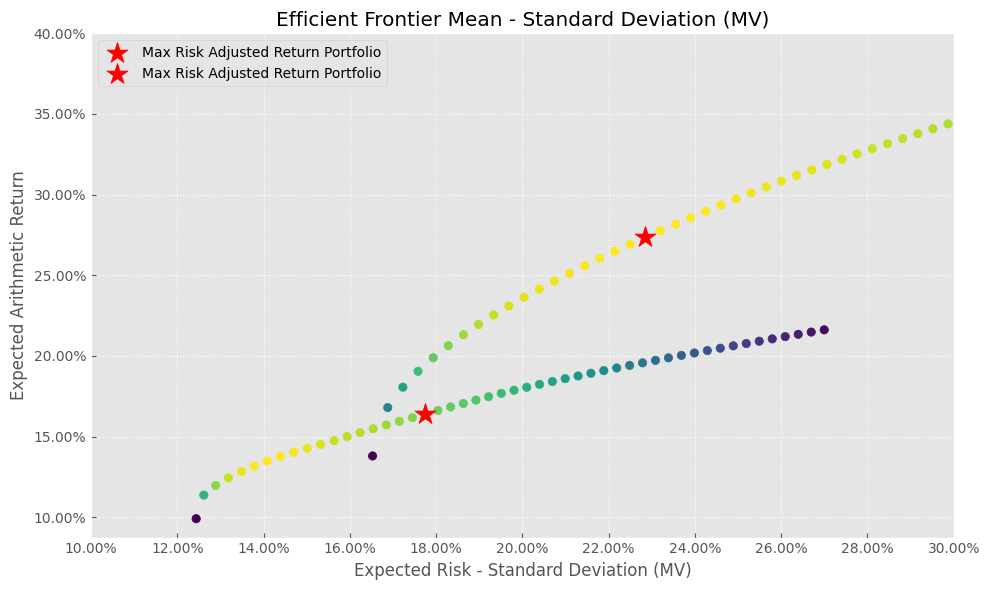

In [12]:
# Plotting the efficient frontier

label = 'Max Risk Adjusted Return Portfolio' # Title of point
mu_error = port_error.mu # Expected returns
cov_error = port_error.cov # Covariance matrix
returns_error = port_error.returns # Returns of the assets

ax = plot_frontier_modif(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

ax = plot_frontier_modif(w_frontier=frontier_error, mu=mu_error, cov=cov_error, returns=returns_error, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

In [21]:
mat_error_df = pd.DataFrame(mat_error)

In [26]:
ret.head(1)

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,TGT
Date,,,,,,,,
2003-01-03,0.006754,-0.003541,-0.012097,-0.002481,0.005218,-0.013631,0.001303,-0.030859


In [27]:
mat_error_df.head(1)

,0,1,2,3,4,5,6,7
0,0.9553,0.9553,1.0447,0.0,1.0447,0.0,1.0447,0.0


In [23]:
ret.values * mat_error_df

,0,1,2,3,4,5,6,7
0,0.006452,-0.003383,-0.012638,-0.000000,0.005451,-0.000000,0.001361,-0.000000
1,0.000000,-0.000000,0.000000,0.003564,-0.044624,-0.007612,0.017405,0.000000
2,-0.003202,-0.046995,-0.000000,-0.012233,0.046136,0.042835,0.000000,-0.000000
3,-0.021108,0.003920,-0.020176,-0.000000,-0.000000,-0.015748,-0.026707,0.000000
4,0.008537,0.018934,0.053490,0.000000,0.022254,0.020516,0.030239,0.000000
...,...,...,...,...,...,...,...,...
5029,-0.000000,0.059844,0.009601,0.000000,-0.000000,0.010497,0.002166,0.012165
5030,-0.000000,0.008623,-0.003806,0.004503,0.003260,0.004958,-0.000000,0.016016
5031,-0.000000,-0.000000,-0.000000,-0.000000,-0.016046,-0.012948,-0.009797,0.000000
5032,0.027058,0.016880,0.011865,-0.006044,0.018737,0.000000,0.026395,0.016839


In [46]:
years = ret.index.year.unique()
years_str = [str(year) for year in years]
lista_de_listas = list(zip(years_str[:-1], years_str[1:]))
# Convertir las tuplas en listas
lista_de_listas = [list(tupla) for tupla in lista_de_listas]
lista_de_listas[0]

['1990', '1991']

In [60]:
years = ret.index.year.unique()
lista_de_listas = list(zip(years[:-1], years[1:]))
# Convertir las tuplas en listas
lista_de_listas = [list(tupla) for tupla in lista_de_listas]
lista_de_listas[0]
ret[ret.index.year.isin(lista_de_listas[0])]

[1990, 1991]

Calculamos los errores cometidos cuuando empleamos periodos de un año. En este caso, como $T=1$, el error es igual a la volatilidad del activo.

In [16]:
years = ret.index.year.unique()
years_str = [str(year) for year in years]

mu_año = pd.DataFrame(index=years, columns=assets)
error_mu = pd.DataFrame(index=years, columns=assets)

for año in years:
    ret_year = ret.loc[str(año)]
    mu_tmp = ret_year.mean()
    mu_año.loc[año] = mu_tmp*252
    std_tmp = ret_year.std()*np.sqrt(252)
    # T = ret_year.shape[0]
    # eps_mu = std_tmp / np.sqrt(T)
    error_mu.loc[año] = std_tmp


In [15]:
fig = px.line(error_mu, x=error_mu.index, y=error_mu.columns, title="ERROR COMETIDO EN LOS RETORNOS ANUALES ESPERADOS")

# Cambiar los títulos de los ejes
# Establecer el título del eje x
fig.update_layout(xaxis_title="Año", font_family="serif")
fig.update_layout(yaxis_title="Error (€)", font_family="serif")
#fig.set_yaxis_title("Error (€)")

# Mostrar la gráfica
fig.show()

In [17]:
error_mu.head(3)

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,TGT
Date,,,,,,,,
1990,0.434349,0.428483,0.495305,0.267849,0.332913,0.263514,0.387761,0.265724
1991,0.464603,0.389394,0.398971,0.258193,0.346367,0.224188,0.367821,0.254897
1992,0.355329,0.363375,0.347181,0.262157,0.259575,0.185438,0.343219,0.262702


In [18]:
mu_año.head(3)

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,TGT
Date,,,,,,,,
1990,0.249773,-0.062925,-0.14921,0.111736,-0.110109,0.260562,0.602917,-0.06827
1991,0.388052,0.173762,0.330501,0.421688,-0.153712,0.489879,0.861497,0.130033
1992,0.129228,0.247297,0.212605,0.049776,0.227304,0.00718,0.198058,0.257769


In [19]:
(error_mu/mu_año).head(3)

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,TGT
Date,,,,,,,,
1990,1.738977,-6.809416,-3.31951,2.397148,-3.023486,1.011329,0.643141,-3.892264
1991,1.197272,2.240965,1.207172,0.612286,-2.253346,0.45764,0.426955,1.960253
1992,2.749626,1.469387,1.632982,5.26677,1.141971,25.82567,1.732918,1.019135


In [30]:
error_mu_pct = np.abs(100 * (error_mu/mu_año))

fig = px.line(error_mu_pct, x=error_mu_pct.index, y=error_mu_pct.columns, title="PORCENTAJE DE ERROR COMETIDO EN LOS RETORNOS ANUALES ESPERADOS")

# Cambiar los títulos de los ejes
# Establecer el título del eje x
fig.update_layout(xaxis_title="Año", font_family="serif")
fig.update_layout(yaxis_title="Error %", font_family="serif")
#fig.set_yaxis_title("Error (€)")

# Mostrar la gráfica
fig.show()

Veamos qué ocurre si empleamos datos de dos años en vez de uno:

In [23]:
lista_dos_años = list(zip(years[:-1], years[1:]))
# Convertir las tuplas en listas
lista_dos_años = [list(tupla) for tupla in lista_dos_años]
lista_dos_años[0]


[1990, 1991]

In [28]:
mu_2 = pd.DataFrame(index=years, columns=assets)
error_mu_2 = pd.DataFrame(index=years, columns=assets)
num_años = 2

for periodo in lista_dos_años:
    ret_periodo = ret[ret.index.year.isin(periodo)]
    mu_periodo = ret_periodo.mean()
    mu_2.loc[periodo[0]] = mu_periodo * (num_años*252)
    std = ret_periodo.std()*np.sqrt(num_años*252)
    T = ret_periodo.shape[0]
    eps_mu = std / np.sqrt(num_años)
    error_mu_2.loc[periodo[0]] = eps_mu

error_mu_2 = error_mu_2.shift(1).dropna()


In [26]:
error_mu_2_pct.head(3)

,AAPL,APA,CMCSA,CPB,JCI,MO,MSFT,TGT
Date,,,,,,,,
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,43823.274608,48943.144246,41725.504879,28156.290553,230081.229023,24835.69451,17984.298072,33790.939482
1992,47442.418373,34784.429345,19368.959549,181836.67717,31808.747793,50104.429746,95832.989005,72390.397921


In [29]:
error_mu_2_pct = np.abs(100 * error_mu_2/mu_2)

fig = px.line(error_mu_2_pct, x=error_mu_2_pct.index, y=error_mu_2_pct.columns, title="PORCENTAJE DE ERROR COMETIDO EN LOS RETORNOS ANUALES ESPERADOS")

# Cambiar los títulos de los ejes
# Establecer el título del eje x
fig.update_layout(xaxis_title="Año", font_family="serif")
fig.update_layout(yaxis_title="Error %", font_family="serif")
#fig.set_yaxis_title("Error (€)")

# Mostrar la gráfica
fig.show()

In [57]:
año = '1999'

ret_year = ret.loc[año]
mu = ret_year.mean()
std = ret_year.std()
T = ret_year.shape[0]
eps_mu = std / np.sqrt(T)
eps_mu/mu

AAPL      0.637063
APA       1.289441
CMCSA     1.102421
CPB      -0.996134
CSCO      0.499125
JCI      14.430280
MO       -0.574255
MSFT      0.726015
TGT       1.183885
dtype: float64

In [13]:
mean_20 = ret.rolling(20).mean().dropna()
cov_20 = ret.rolling(20).cov().dropna()
std_20 = ret.rolling(20).std().dropna()

In [14]:
mean_126 = ret.rolling(126).mean().dropna()
cov_126 = ret.rolling(126).cov().dropna()
std_126 = ret.rolling(126).std().dropna()

In [15]:
mean_252 = ret.rolling(252).mean().dropna()
cov_252 = ret.rolling(252).cov().dropna()
std_252 = ret.rolling(252).std().dropna()

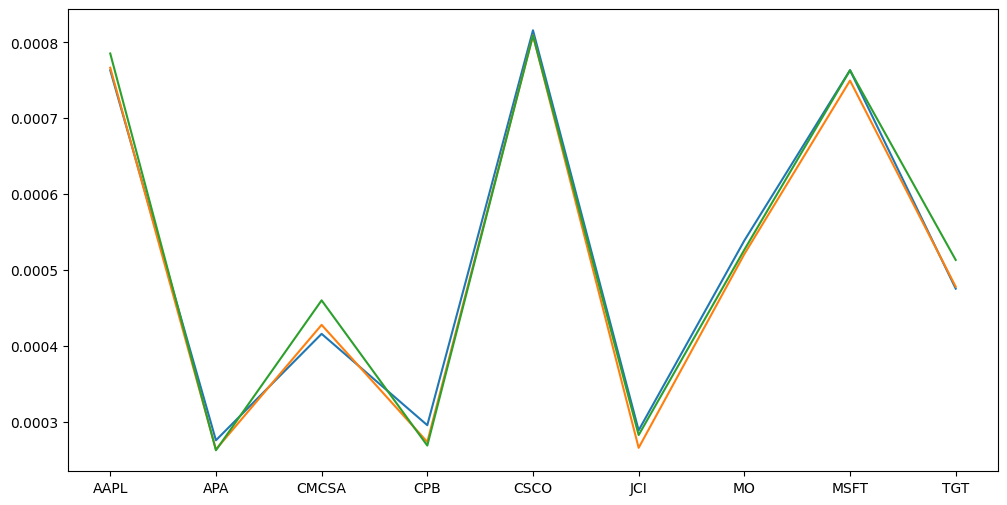

In [23]:
mean_20.mean(axis=0).plot(figsize=(12, 6), label='20 días')
mean_126.mean(axis=0).plot(label='126 días')
mean_252.mean(axis=0).plot(label='252 días')
plt.show()

In [31]:
np.percentile(mean_20.loc[:, 'CPB'], 0.05)

-0.014234930889379351

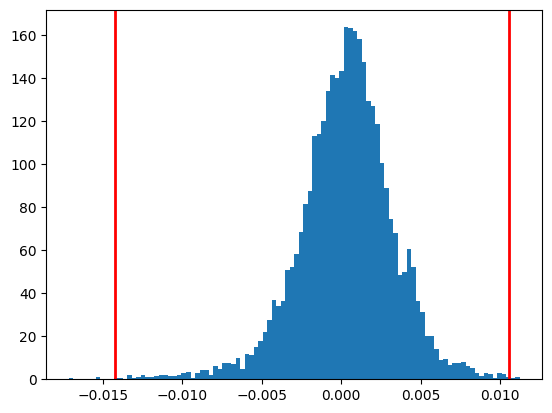

In [37]:
plt.hist(mean_20.loc[:, 'CPB'], bins=100, density=True, label='20 días')
# Línea vertical
plt.axvline(x=np.percentile(mean_20.loc[:, 'CPB'], 0.05), color='red', linewidth=2)
plt.axvline(x=np.percentile(mean_20.loc[:, 'CPB'], 99.95), color='red', linewidth=2)
plt.show()

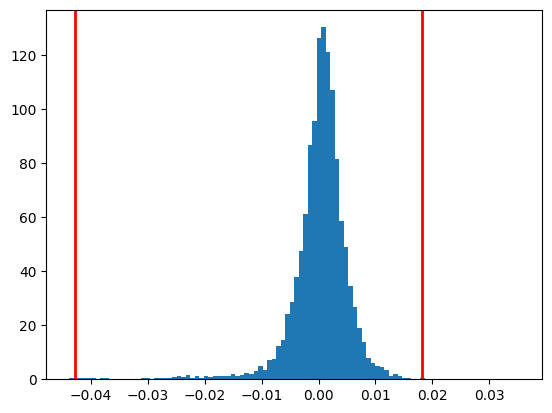

In [38]:
plt.hist(mean_20.loc[:, 'JCI'], bins=100, density=True, label='20 días')
# Línea vertical
plt.axvline(x=np.percentile(mean_20.loc[:, 'JCI'], 0.05), color='red', linewidth=2)
plt.axvline(x=np.percentile(mean_20.loc[:, 'JCI'], 99.95), color='red', linewidth=2)
plt.show()

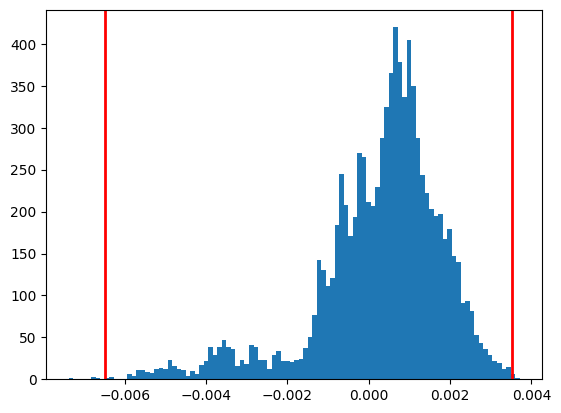

In [39]:
plt.hist(mean_252.loc[:, 'JCI'], bins=100, density=True, label='20 días')
# Línea vertical
plt.axvline(x=np.percentile(mean_252.loc[:, 'JCI'], 0.05), color='red', linewidth=2)
plt.axvline(x=np.percentile(mean_252.loc[:, 'JCI'], 99.95), color='red', linewidth=2)
plt.show()

In [26]:
100 * (mean_20.mean(axis=0) - mean_126.mean(axis=0))/mean_20.mean(axis=0)


AAPL    -0.446989
APA      4.370127
CMCSA   -2.847391
CPB      7.470602
CSCO     0.826049
JCI      7.980844
MO       3.308762
MSFT     1.797540
TGT     -0.529910
dtype: float64